## Loading required liraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

import xgboost as xgb

%matplotlib inline

## Reading train and test files 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [4]:
test.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,P,N,S133,C,0.0,NaN,NaN,NaN,NaN,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,P,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0


## Basic Stats

In [5]:
train.Approved.value_counts()

0    68693
1     1020
Name: Approved, dtype: int64

In [6]:
train.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,65415.000000,6.971300e+04,69662.000000,42004.000000,42004.000000,22276.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,5.622283e+03,360.928751,39429.982859,3.890629,19.213570,1101.466242,3.948446,0.014631
std,0.807374,1.747671e+05,2288.517927,30727.595990,1.167491,5.847136,752.661394,3.819214,0.120073
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1295.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


In [7]:
y_train = train.Approved
train.drop('Approved', axis = 1, inplace = True)


In [8]:
ntrain = train.shape[0]


data = pd.concat([train,test])

In [9]:
data['DOB'] = pd.to_datetime(data['DOB'])
data['Lead_Creation_Date'] = pd.to_datetime(data['Lead_Creation_Date'])

In [10]:
data['DOB'].describe()

count                   99732
unique                  11672
top       1982-11-01 00:00:00
freq                      345
first     1968-01-04 00:00:00
last      2067-12-31 00:00:00
Name: DOB, dtype: object

In [11]:
data['Lead_Creation_Date'].describe()

count                   99750
unique                     92
top       2016-02-09 00:00:00
freq                     2614
first     2016-01-07 00:00:00
last      2016-12-09 00:00:00
Name: Lead_Creation_Date, dtype: object

In [12]:
data[:ntrain].Lead_Creation_Date.describe()


count                   69713
unique                     92
top       2016-02-09 00:00:00
freq                     1838
first     2016-01-07 00:00:00
last      2016-12-09 00:00:00
Name: Lead_Creation_Date, dtype: object

In [13]:
data[ntrain:].Lead_Creation_Date.describe()


count                   30037
unique                     92
top       2016-02-09 00:00:00
freq                      776
first     2016-01-07 00:00:00
last      2016-12-09 00:00:00
Name: Lead_Creation_Date, dtype: object

## Feature Engg.

In [14]:
#data['sum_null'] = data.isnull().sum(axis = 1)
#data['DOB'] = pd.to_datetime(data['DOB'])
#data['Lead_Creation_Date'] = pd.to_datetime(data['Lead_Creation_Date'])

#data['age'] = data.apply(lambda r: (r['Lead_Creation_Date'] - r['DOB']).days, axis=1)

#data['Lead_Creation_dow'] = data['Lead_Creation_Date'].dt.dayofweek
#data['Lead_Creation_dom'] = data['Lead_Creation_Date'].dt.day
#data['Lead_Creation_year'] = data['Lead_Creation_Date'].dt.year
#data['Lead_Creation_month'] = data['Lead_Creation_Date'].dt.month
#data['date_int'] = data['Lead_Creation_Date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)

#<10 yrs, really??
#data.loc[data['age']<3650, 'age'] = data['age'].mean() 

#data['loan_to_income'] = data['Loan_Amount']/data['Monthly_Income']


In [15]:
cols_obj = data.select_dtypes(['object']).columns
cols_obj

Index(['ID', 'Gender', 'City_Code', 'City_Category', 'Employer_Code',
       'Employer_Category1', 'Customer_Existing_Primary_Bank_Code',
       'Primary_Bank_Type', 'Contacted', 'Source', 'Source_Category'],
      dtype='object')

In [16]:
#cols_obj = data.select_dtypes(['object']).columns

cols_obj = ['Gender', 'City_Code',
            'City_Category', 'Employer_Code', 'Employer_Category1',
            'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
            'Source', 'Source_Category'
           ]

for i in cols_obj:
    if len(set(data[i])) > 40:
        
        #top_cats = data[i].value_counts() > data[i].value_counts().quantile(0.95)
        top_cats = data[i].value_counts().head(40)
        data[i+str('_top_perc')] = data[i]
        data.loc[~data[i].isin(list(top_cats.index)) &
                      ~data[i].isnull(), i+str('_top_perc')] = 'Others'
        
        data.drop(i, axis = 1, inplace = True)
        
        i = i+str('_top_perc')
            
    oh = pd.get_dummies(data[i], prefix=i+ str('_'))

    data.drop(i, axis=1, inplace=True)

    data = pd.concat([data, oh], axis = 1)



In [17]:
print(train.shape)
print(test.shape)

train = data[:ntrain]
test = data[ntrain:]

print(train.shape)
print(test.shape)


(69713, 21)
(30037, 21)
(69713, 186)
(30037, 186)


In [18]:
train.dtypes

ID                                    object
DOB                           datetime64[ns]
Lead_Creation_Date            datetime64[ns]
Employer_Category2                   float64
Monthly_Income                       float64
Existing_EMI                         float64
Loan_Amount                          float64
Loan_Period                          float64
Interest_Rate                        float64
EMI                                  float64
Var1                                   int64
Gender__Female                         uint8
Gender__Male                           uint8
City_Code_top_perc__C10001             uint8
City_Code_top_perc__C10002             uint8
City_Code_top_perc__C10003             uint8
City_Code_top_perc__C10004             uint8
City_Code_top_perc__C10005             uint8
City_Code_top_perc__C10006             uint8
City_Code_top_perc__C10007             uint8
City_Code_top_perc__C10008             uint8
City_Code_top_perc__C10009             uint8
City_Code_

In [19]:
train['Monthly_Income'] = np.log1p(train['Monthly_Income'])
train['Loan_Amount'] = np.log1p(train['Loan_Amount'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
train.head()

,ID,DOB,Lead_Creation_Date,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,...,Source__S160,Source__S161,Source__S162,Source_Category__A,Source_Category__B,Source_Category__C,Source_Category__D,Source_Category__E,Source_Category__F,Source_Category__G
0,APPC90493171225,1979-07-23,2016-07-15,4.0,7.601402,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,APPD40611263344,1986-07-12,2016-04-07,1.0,8.160804,0.0,9.903538,2.0,13.25,953.0,...,0,0,0,0,0,0,0,0,0,1
2,APPE70289249423,1982-10-12,2016-07-19,4.0,7.719130,0.0,10.714440,4.0,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
3,APPF80273865537,1989-01-30,2016-09-07,4.0,8.160804,0.0,11.429555,5.0,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
4,APPG60994436641,1985-04-19,2016-07-20,4.0,9.210440,2500.0,10.819798,2.0,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0


In [21]:
test['Monthly_Income'] = np.log1p(test['Monthly_Income'])
test['Loan_Amount'] = np.log1p(test['Loan_Amount'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:

predictors = train.select_dtypes(['float64', 'int64', 'uint8']).columns


In [23]:
print(train[predictors].shape)
print(test[predictors].shape)

(69713, 183)
(30037, 183)


## Training a XGB Model

In [24]:


xgb_params = {
    'eta': 0.3,
    'max_depth': 5,
    'subsample': 0.6,
    'colsample_bytree': 1,
    'lambda': 3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'silent': 0
}

dtrain = xgb.DMatrix(data=train[predictors], label= y_train)


num_rounds = 10000

model_cv = xgb.cv(xgb_params, dtrain, num_rounds, nfold=10, early_stopping_rounds=20, verbose_eval=1)


[0]	train-auc:0.733172+0.0114799	test-auc:0.722935+0.0205413
[1]	train-auc:0.757739+0.0103098	test-auc:0.747901+0.0227776
[2]	train-auc:0.781066+0.0188349	test-auc:0.770732+0.0224449
[3]	train-auc:0.807519+0.00947383	test-auc:0.794508+0.0214856
[4]	train-auc:0.822546+0.00626603	test-auc:0.805605+0.0162831
[5]	train-auc:0.830276+0.00612354	test-auc:0.808143+0.0135353
[6]	train-auc:0.835919+0.00544892	test-auc:0.811413+0.0131967
[7]	train-auc:0.843023+0.00321126	test-auc:0.815492+0.013629
[8]	train-auc:0.850653+0.00148531	test-auc:0.821318+0.0128983
[9]	train-auc:0.856435+0.00293128	test-auc:0.823764+0.0145015
[10]	train-auc:0.860433+0.00312257	test-auc:0.825117+0.0134973
[11]	train-auc:0.86448+0.00222351	test-auc:0.826888+0.0123509
[12]	train-auc:0.867704+0.00116686	test-auc:0.82813+0.0130329
[13]	train-auc:0.870427+0.00158545	test-auc:0.830379+0.0113786
[14]	train-auc:0.872689+0.00140632	test-auc:0.833035+0.0118745
[15]	train-auc:0.874711+0.00156694	test-auc:0.836235+0.0104892
[16]	tra

In [25]:
model = xgb.train(xgb_params, dtrain, num_boost_round = 44)

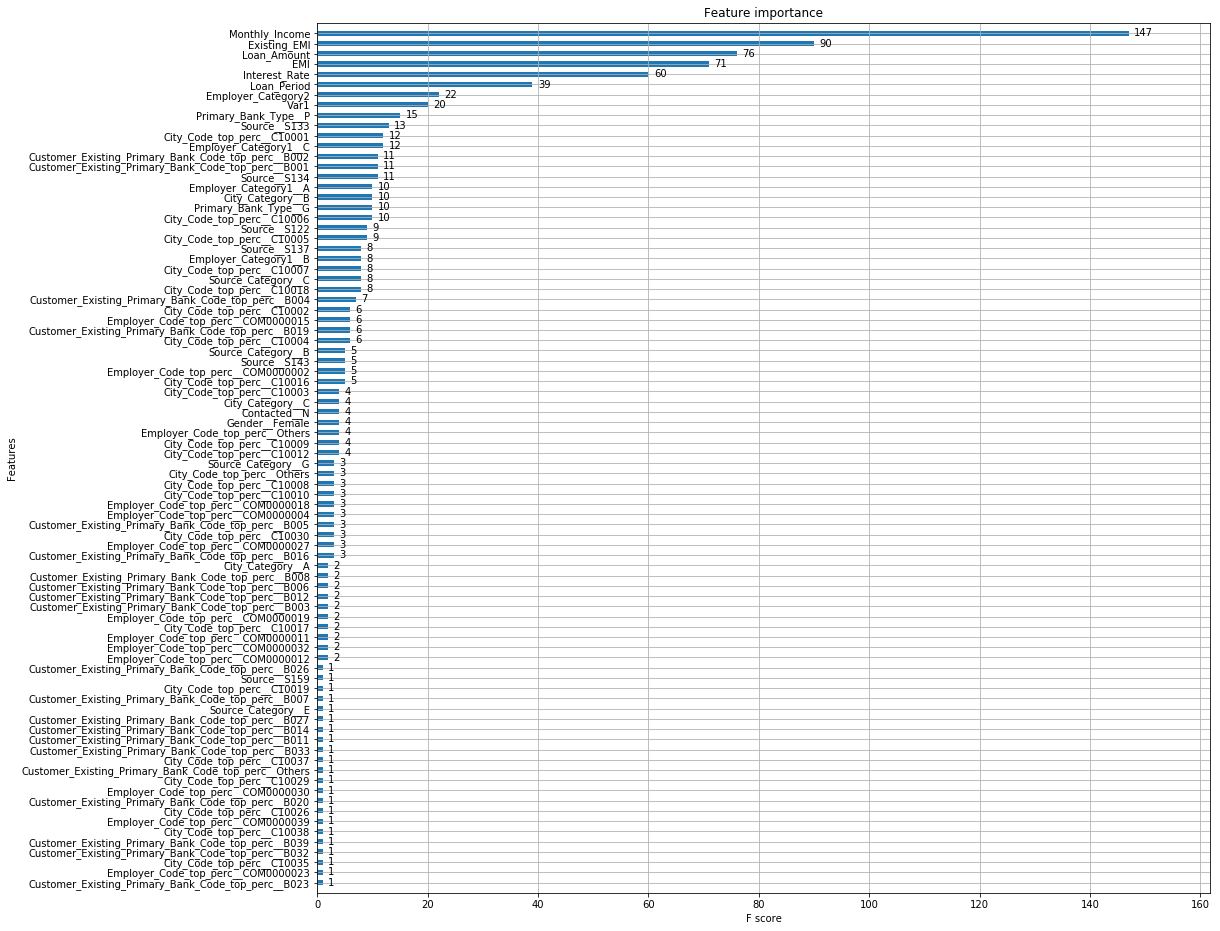

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
xgb.plot_importance(model, height=0.5, ax=ax)

## Generating XGB Predictions

In [27]:
dtest = xgb.DMatrix(data=test[predictors])

preds = model.predict(dtest)

df_sub = pd.DataFrame({'ID': test.ID, 'Approved': preds})

df_sub.to_csv('sub_xgb.csv', index=False)


## Training a Logistic Regression Model

In [29]:
from sklearn import linear_model

lm = linear_model.LogisticRegression()

lm.fit(train.loc[:,predictors].fillna(0), y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Generating LR Predictions

In [30]:
pred_lm = lm.predict(test.loc[:,predictors].fillna(0))


In [31]:

df_sub = pd.DataFrame({'ID': test.ID, 'Approved': pred_lm})

df_sub.to_csv('sub_lm.csv', index=False)


## Merging both

In [32]:
xgb = pd.read_csv('sub_xgb.csv')

lm = pd.read_csv('sub_lm.csv')

In [35]:
df = xgb

df['Approved'] = xgb['Approved'] * 0.99 + lm['Approved']*0.01
df.Approved[df['Approved']>1] = 1
df.Approved[df['Approved']<0] = 0

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [36]:
df.to_csv("sub_xgb_lm.csv",index = False)